In [2]:
library(NELSI)

In [3]:
vero_ce_empirical <- read.table('ce_veronika.log', head = T)

In [5]:
pps_runs <- dir('ce_veronika_test/', pattern = 'log')

In [46]:
out_matrix <- matrix(NA, length(pps_runs), 3)

for(i in 1:length(pps_runs)){
    temp_log <- read.table(paste0('ce_veronika_test/', pps_runs[i]), head = T)
    out_matrix[i, ] <- c(median(temp_log$likelihood), 
                         median(temp_log$ePopSize), median(temp_log$growthRate.))
}

colnames(out_matrix) <- c('likelihood', 'ePopSize', 'growthRate')
out_matrix <- as.data.frame(out_matrix)

Warning message:
In file(file, "rt"): cannot open file 'ce_veronika_test/ce_veronika_pps_10.log': No such file or directory

ERROR: Error in file(file, "rt"): cannot open the connection


In [33]:
pps <- read.tree('ce_veronika_ce_pps.trees')
emp_tree <- read.tree('vero_dated.tree')
trees <- list()
trees[[1]] <- emp_tree
trees[2:(length(pps)+1)] <- lapply(pps, function(x) x)
class(trees) <- 'multiPhylo'
rhs <- sapply(trees, function(x) max(intnode.times(x)))

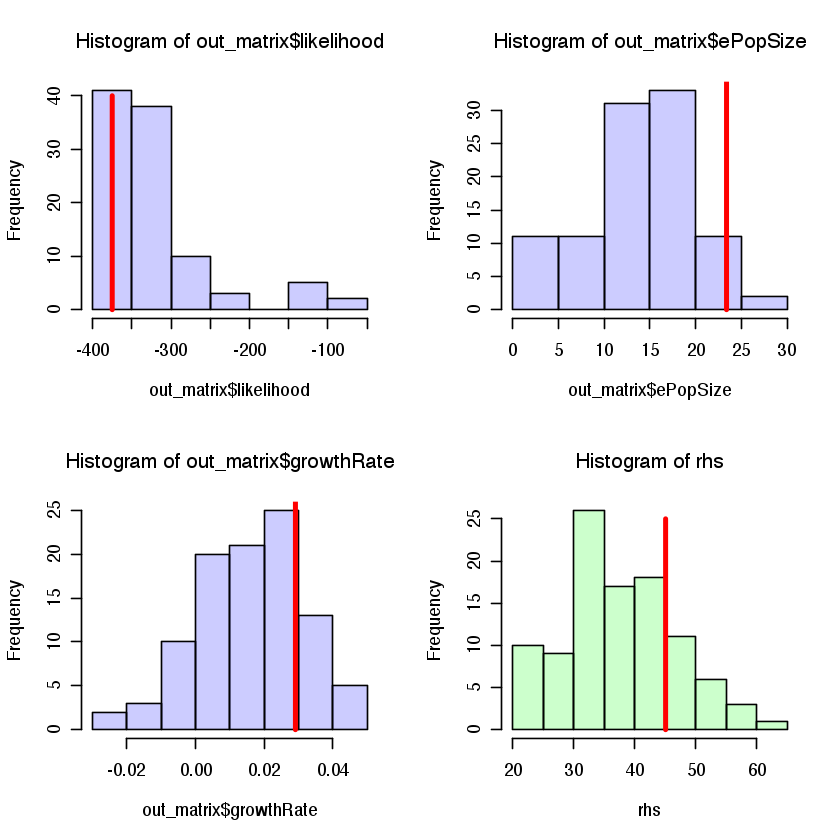

In [35]:
par(mfrow = c(2, 2))
hist(out_matrix$likelihood, col = rgb(0, 0, 1, 0.2))
lines(x = rep(mean(vero_ce_empirical$likelihood), 2), y = c(0, 40), col = 'red', lwd = 3)
hist(out_matrix$ePopSize, col = rgb(0, 0, 1, 0.2))
lines(x = rep(mean(vero_ce_empirical$ePopSize), 2), y = c(0, 40), col = 'red', lwd = 3)
hist(out_matrix$growthRate, col = rgb(0, 0, 1, 0.2))
lines(x = rep(mean(vero_ce_empirical$growthRate.), 2), y = c(0, 40), col = 'red', lwd = 3)
hist(rhs, col = rgb(0, 1, 0, 0.2))
lines(c(rhs[1], rhs[1]), y = c(0, 25), col = 'red', lwd = 3)

In [40]:
sum(mean(vero_ce_empirical$ePopSize) > out_matrix$ePopSize)/nrow(out_matrix)
sum(mean(vero_ce_empirical$growthRate.) > out_matrix$growthRate)/nrow(out_matrix)
sum(mean(vero_ce_empirical$likelihood) > out_matrix$likelihood)/nrow(out_matrix)

[1] 0.979798

[1] 0.8080808

[1] 0.02020202

In [45]:
quantile(out_matrix$likelihood, c(0.025, 0.975))

2.5%     97.5% 
-369.9387 -105.9032

In [43]:
mean(vero_ce_empirical$likelihood)

[1] -375.0542